# **Simulation of a Random Variable**
Remember: a discrete random variable $X$ is completely characterized by its probability mass function $p_X(x)$:

$$p_X(x) = \mathbb{P}[X = x]$$

for any $x \in D$, where $D$ is the support of the variable (namely the set of all its possible outcomes).

In the following code:
1. A random number _u_ is generated.
2. The function iterates over the cumulative probabilities of the PMF.
3. When the cumulative probability exceeds _u_, the corresponding value from the support is selected as the simulated value.

In [2]:
def DiscreteRVSimulator(D, PMF):

  if D.shape != PMF.shape:
    print("Dimension mismatch!")
  elif PMF.sum() != 1:
    print("Probability mass weights do not sum up to 1!")
  elif all( val >= 0 for val in PMF ) == False:
    print("There is a strictly negative probability weight....")

  i = 0
  x = D[i]  # In questo momento 'x' è associata a 0, cioè il primo elemento di D (nel caso di sotto a 1) 

  u = np.random.uniform() # Generates a random number 'u' from a uniform distribution in [0, 1]. Sarà matchato con la CDF.
  current_CDF = PMF[i]  # Starts building the CDF with the first probability mass.

  while u > current_CDF:
    i += 1  # Move to the next value in D
    x = D[i]  # Update x to the next value in the support
    current_CDF += PMF[i]  # Add the probability mass of the next value to the CDF

  return x  

Testing the DiscreteRVSimulator function with a simple discrete variables that can take only three values:
$$
\begin{array}{cc}
x & p_X(x) \\
1 & 0.3 \\
4 & 0.4 \\
7 & 0.3
\end{array}
$$

In [3]:
import numpy as np

NSim = 1000

D_myOwn = np.array([1, 4, 7])
PMF_myOwn = np.array([0.3, 0.4, 0.3])

X = np.zeros(shape=(NSim,1)) # Creo un'array di NSim zeri e 1 colonna quindi "NSim x 1"
for i in range(int(NSim)):
  X[i] = DiscreteRVSimulator(D_myOwn,PMF_myOwn)

In [4]:
%%capture
X

Check:

In [5]:
frequencies = np.zeros(shape=D_myOwn.shape)

i = 0

for d in D_myOwn:
  frequencies[i] = np.count_nonzero(X == D_myOwn[i])/NSim
  i += 1

In [6]:
frequencies

array([0.297, 0.393, 0.31 ])

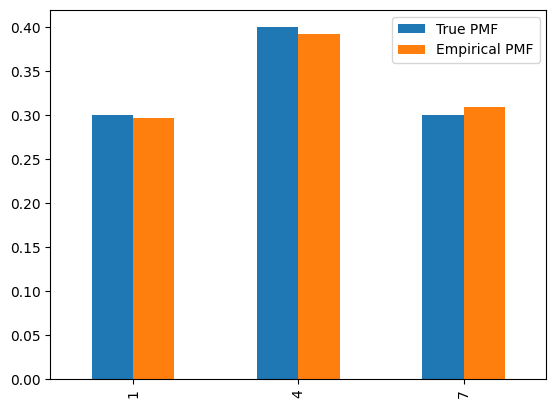

In [7]:
import pandas as pd

discreteRVtest = pd.DataFrame(np.array([PMF_myOwn, frequencies]).T, columns = ['True PMF','Empirical PMF'], index = D_myOwn)
discreteRVtest.plot(kind = 'bar'); # The 'kind=bar command is used to print a bar chart

## **Simulation of a normally distributed random variable**
Remeber: if $U \sim U(0,1)$ denotes a uniformely distributed random variable over the interval $[0,1]$ and $\Phi$ denotes the cumulative distribution function of the standard normal random variable, it holds:
$$ \Phi^{-1} \left( U \right) \sim N(0,1).$$

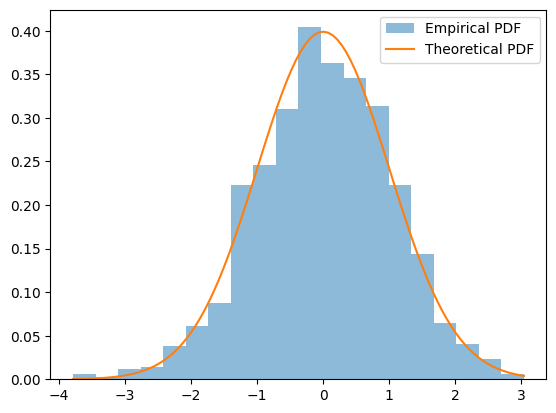

In [ ]:
from scipy.stats import norm
import matplotlib.pyplot as plt

U = np.random.uniform(size=(NSim,1))    
N = norm.ppf(U)

n = np.linspace(min(N),max(N),100)

plt.hist(N, density = True, label='Empirical PDF', alpha = 0.5, bins = 20)
plt.plot(n, norm.pdf(n), label = 'Theoretical PDF')

plt.legend();

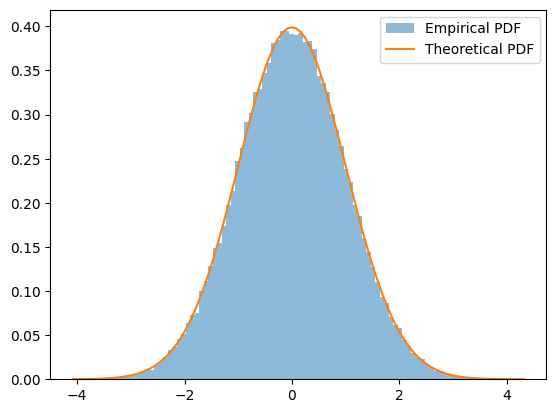

In [9]:
NSim = 100000

N = np.random.normal(loc = 0, scale = 1.0, size =(NSim,1))

n = np.linspace(min(N),max(N),100)

plt.hist(N, density = True, label='Empirical PDF', alpha = 0.5, bins = 100)
plt.plot(n, norm.pdf(n), label = 'Theoretical PDF')

plt.legend();